## Observations and Insights

## Insights
* There is a strong correlation between weight and tumor volume derived from the r-squared of 0.84 which means that thee variables are dependent on each other in a high magnitude. If one changes will affect the other directly.
* With Capomulin and Ramicane as drug regimens for cancer treatment, the tumor volume is reduced around half through time during the 45 days.
* Capomulin and Ramicane are the most effective drug regimens considering time and reduction of tumor volume regardless of its gender.

## Tasks
* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_descriptiondata = pd.read_csv(mouse_metadata)
study_metaresults = pd.read_csv(study_results)

In [2]:
# Review how the data is organized in the table
mouse_descriptiondata.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Review how the data is organized in the table
study_metaresults.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_descriptiondata.shape

(249, 5)

In [5]:
study_metaresults.shape

(1893, 4)

In [6]:
# Combine all the data of mouse and study into a single dataset, notice both tables have Mouse ID, nevertheless is preferable to join with all the data
mousestudy_merge = pd.merge(mouse_descriptiondata, study_metaresults, how="outer", on="Mouse ID")
mousestudy_merge.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Review for with dropna missing values and fill null data with fillna
missing_data = mousestudy_merge.dropna(how="any")
missing_data.count()
# Since values are same as merged table, there aren't na values

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [8]:
mousestudy_merge.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [9]:
mousestudy_merge.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [10]:
mousestudy_merge.shape

(1893, 8)

In [11]:
# Set as index the column that is in both tables Mouse ID
mousestudy_merge.sort_values(["Drug Regimen"],ascending=True)
mousestudy_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [12]:
# Calculate the mean and groupby for each drug regimen
mean_mousestudy = round(mousestudy_merge.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],2)
mean_mousestudy

Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.32
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Calculate the median and groupby for each drug regimen
median_mousestudy = round(mousestudy_merge.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],2)
median_mousestudy

Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.85
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Calculate the variance and groupby for each drug regimen
variance_mousestudy = round(mousestudy_merge.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],2)
variance_mousestudy

Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     42.35
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Calculate the standard deviation and groupby for each drug regimen
std_mousestudy = round(mousestudy_merge.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],2)
std_mousestudy

Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.51
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Calculate the SEM and groupby for each drug regimen
sem_mousestudy = round(mousestudy_merge.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],2)
sem_mousestudy

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.51
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen by joining the calculated values
statistics_table = pd.DataFrame({"Mean": mean_mousestudy, 
                                               "Median": median_mousestudy, 
                                               "Variance": variance_mousestudy,
                                               "Standard Deviation": std_mousestudy, 
                                               "SEM": sem_mousestudy})
statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [18]:
#Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of data points for each treatment regimen.
#NOTE: These plots should look identical.

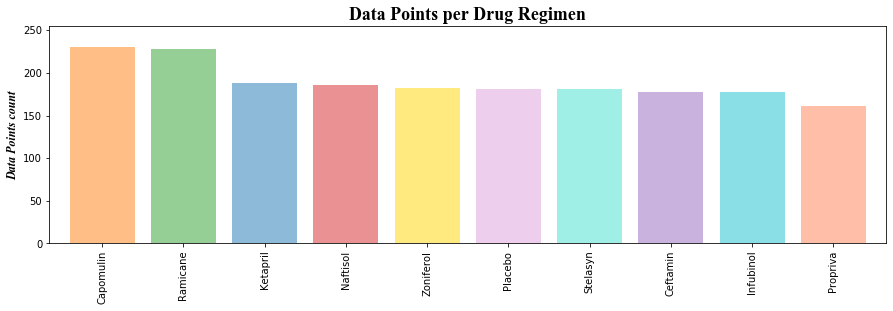

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
colors=["tab:orange","tab:green","tab:blue","tab:red","gold","plum","turquoise","tab:purple","tab:cyan","coral"]
drugregimen_count = mousestudy_merge["Drug Regimen"].value_counts()
drugregimen_count.plot(kind="bar", figsize=(15,4), color=colors, alpha=0.5, align="center",width=0.8)
plt.ylim(0, max(drugregimen_count)+25)
plt.title("Data Points per Drug Regimen",fontsize=18, fontweight="semibold", family="Times New Roman")
plt.ylabel("Data Points count",style="italic",family="Times New Roman",fontsize=12)
plt.show()

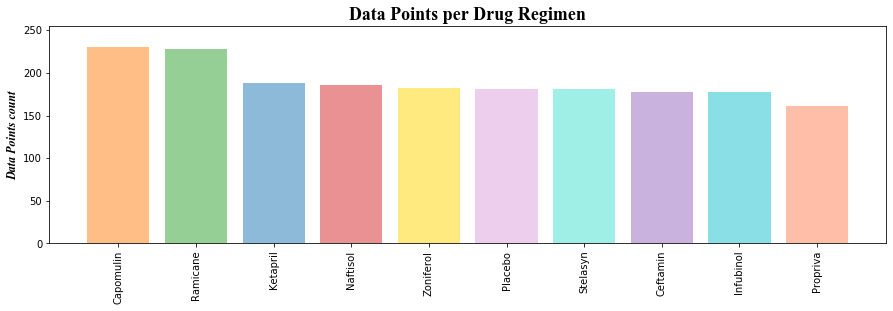

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
colors=["tab:orange","tab:green","tab:blue","tab:red","gold","plum","turquoise","tab:purple","tab:cyan","coral"]
drugregimen_names = mousestudy_merge["Drug Regimen"].value_counts().index.tolist()
datapoint_count = mousestudy_merge["Drug Regimen"].value_counts().tolist()
plt.figure(figsize=(15,4))
plt.bar(drugregimen_names,datapoint_count, color=colors, alpha=0.5, align="center", width=0.8)
plt.ylim(0, max(datapoint_count)+25)
plt.xticks(drugregimen_names, rotation="vertical")
plt.title("Data Points per Drug Regimen",fontsize=18, fontweight="semibold", family="Times New Roman")
plt.ylabel("Data Points count",style="italic",family="Times New Roman",fontsize=12)
plt.show()

## Pie plots

In [21]:
# Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.
# NOTE: These plots should look identical.

In [22]:
mice_count = mousestudy_merge["Sex"].value_counts()
mice_count

Male      958
Female    935
Name: Sex, dtype: int64

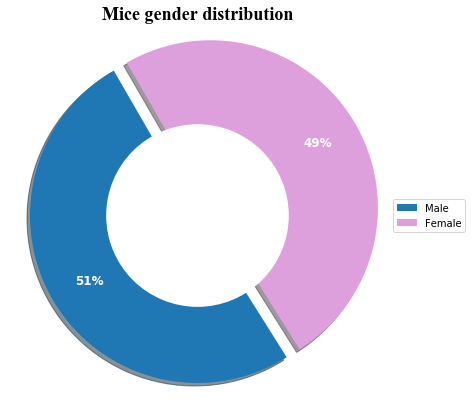

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=["tab:blue","plum"]
explode = (0, 0.1)
mice_count = mousestudy_merge["Sex"].value_counts()
mice_count.plot(kind="pie",labels=None,autopct="%1.0f%%",colors=colors,figsize=(7,7),fontsize=12,startangle=120,explode=explode,shadow=True,pctdistance=.75,textprops={"color":"white","weight":"semibold"},radius=1.1)
plt.title("Mice gender distribution",fontsize=18, fontweight="semibold", family="Times New Roman")
plt.axis("off")
plt.legend(labels=mousestudy_merge["Sex"].unique(),loc='center left', bbox_to_anchor=(1.0, 0.5))
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

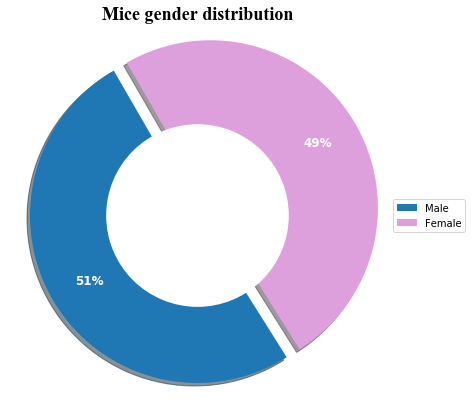

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=["tab:blue","plum"]
explode = (0, 0.1)
plt.figure(figsize=(7,7))
mice_gender = mousestudy_merge["Sex"].value_counts().index.tolist()
gender_count = mousestudy_merge["Sex"].value_counts().tolist()
plt.pie(gender_count,labels=None,colors=colors,explode=explode,autopct="%1.0f%%",shadow=True,startangle=120,pctdistance=.75,textprops={"color":"white","weight":"semibold","size":"12"},radius=1.1)
plt.title("Mice gender distribution",fontsize=18, fontweight="semibold", family="Times New Roman")
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels=mousestudy_merge["Sex"].unique(),loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.axis("off")
plt.show()

## Quartiles, outliers and boxplots

In [25]:
#Determine the max value for Timepoint
mousestudy_merge["Timepoint"].describe()

count    1893.000000
mean       19.572108
std        14.079460
min         0.000000
25%         5.000000
50%        20.000000
75%        30.000000
max        45.000000
Name: Timepoint, dtype: float64

In [26]:
# Find four promising treatment regimens
search_timepointmax=mousestudy_merge.loc[mousestudy_merge["Timepoint"] == 45]
search_timepointmax

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [27]:
# With 45 max value for timepoint the drug regimens to use are Capomulin, Ramicane, Infubinol and Ceftamin as mentioned in the task instructions
#promising_regimen1 = "Capomulin"
#promising_regimen2 = "Ramicane"
#promising_regimen3 = "Infubinol"
#promising_regimen4 = "Ceftamin"

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
promising_regimens = mousestudy_merge.loc[(mousestudy_merge["Drug Regimen"] == "Capomulin") | (mousestudy_merge["Drug Regimen"] == "Ramicane") | (mousestudy_merge["Drug Regimen"] == "Infubinol") | (mousestudy_merge["Drug Regimen"] == "Ceftamin"), :]
promising_regimenssorted = promising_regimens.sort_values("Timepoint", ascending = False)
promising_regimensmax = promising_regimenssorted.drop_duplicates(subset="Mouse ID", keep="first")
promising_regimensmax

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [29]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = promising_regimensmax["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print(f"The lower quartile of tumors is: {lowerq}")
print(f"The upper quartile of tumors is: {upperq}")
print(f"The interquartile range of tumors is: {iqr}")
print(f"The the median of tumors is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumors is: 37.19
The upper quartile of tumors is: 59.93
The interquartile range of tumors is: 22.74
The the median of tumors is: 45.0 
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.


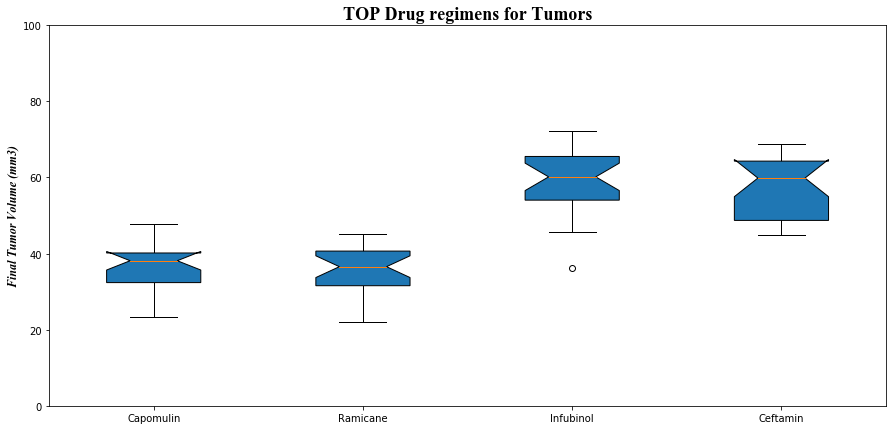

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
max_promisingregimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
final_regimens = promising_regimensmax.reset_index()
final_tumors = final_regimens.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumors_regimens = pd.DataFrame(final_tumors)
tumors_regimens = tumors_regimens.reindex(max_promisingregimens)
tumors_volume = [vol for vol in tumors_regimens["Tumor Volume (mm3)"]]
plt.figure(figsize=(15,7))
plt.boxplot(tumors_volume, labels=max_promisingregimens,patch_artist=True,notch=True)
plt.ylim(0, 100)
plt.title("TOP Drug regimens for Tumors", fontsize=18,fontweight="semibold", family="Times New Roman")
plt.ylabel("Final Tumor Volume (mm3)",style="italic",family="Times New Roman",fontsize=12)
plt.show()

## Line and scatter plots

In [31]:
# Select a Drug Regimen to analize from table: 
drugregimen_select = input("Which Drug Reference will we analyze? ")

Which Drug Reference will we analyze? Capomulin


In [32]:
# Extract Capomulin data
drugregimen_selected = mousestudy_merge.loc[mousestudy_merge["Drug Regimen"] == drugregimen_select]
drugregimen_selected

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [33]:
# Unique counts for mouse ID to choose an aleatory ID
mouse_selection = drugregimen_selected["Mouse ID"].unique()
mouse_selection

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [34]:
# Select a mouse ID to analize from Capomulin table: 
mouse_selected = input("Which mouse ID will we analyze? ")

Which mouse ID will we analyze? i738


In [35]:
# Extract data of mouse with capomulin
mouse_selectedtime = drugregimen_selected.loc[drugregimen_selected["Mouse ID"] == mouse_selected]
mouse_selectedtime

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0
200,i738,Capomulin,Female,23,20,25,34.973438,0
201,i738,Capomulin,Female,23,20,30,35.578780,1
202,i738,Capomulin,Female,23,20,35,36.175953,1
203,i738,Capomulin,Female,23,20,40,36.843898,2
204,i738,Capomulin,Female,23,20,45,37.311846,2


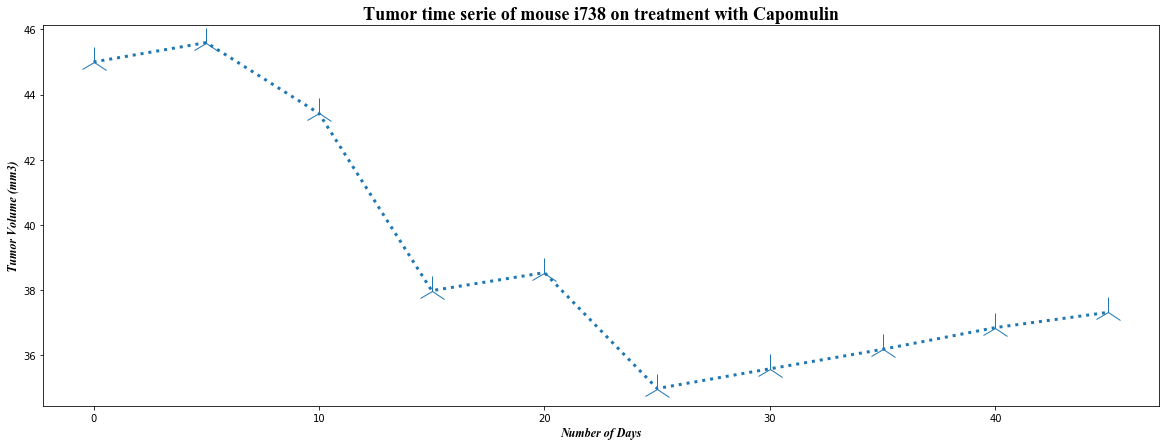

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_days = mouse_selectedtime["Timepoint"]
tumor_volume = mouse_selectedtime["Tumor Volume (mm3)"]
plt.figure(figsize=(20,7))
plt.plot(time_days, tumor_volume,marker="2", linestyle=':',ms=30,color="tab:blue",linewidth=3)
plt.xlabel("Number of Days",style="italic",family="Times New Roman",fontsize=12)
plt.ylabel("Tumor Volume (mm3)",style="italic",family="Times New Roman",fontsize=12)
plt.title(f"Tumor time serie of mouse {mouse_selected} on treatment with Capomulin",fontsize=18,fontweight="semibold", family="Times New Roman")
plt.show()

In [37]:
# Calculate the average weight of mice on Capomulin treatment
#averageweight_mouse = round(drugregimen_capomulin["Weight (g)"].mean(),2)
#averageweight_mouse

In [38]:
# Calculate the average tumor volume of mice on Capomulin treatment
#averagevolume_tumor = round(drugregimen_capomulin["Tumor Volume (mm3)"].mean(),2)
#averagevolume_tumor

In [39]:
groupby_mouseid = drugregimen_selected.groupby(["Mouse ID"])
averageweight_mouse = groupby_mouseid["Weight (g)"].mean()
averagevolume_tumor = groupby_mouseid["Tumor Volume (mm3)"].mean()

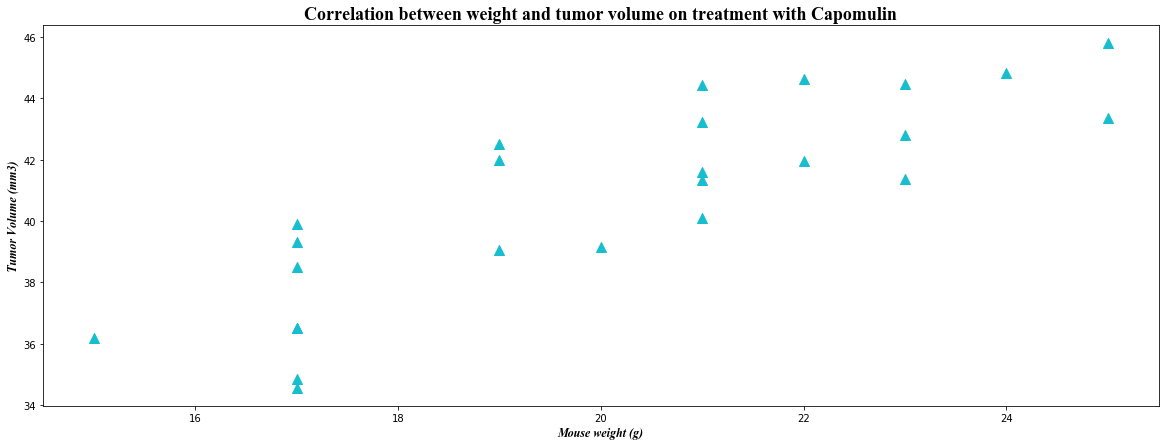

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure(figsize=(20,7))
plt.scatter(averageweight_mouse, averagevolume_tumor,marker="^",color="tab:cyan",s=100)
plt.xlabel("Mouse weight (g)",style="italic",family="Times New Roman",fontsize=12)
plt.ylabel("Tumor Volume (mm3)",style="italic",family="Times New Roman",fontsize=12)
plt.title(f"Correlation between weight and tumor volume on treatment with Capomulin",fontsize=18,fontweight="semibold", family="Times New Roman")
plt.show()

In [41]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin regimen treatment.
correlation = st.pearsonr(averageweight_mouse,averagevolume_tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.84
The equation of the regression line is: y = 0.95x + 21.55


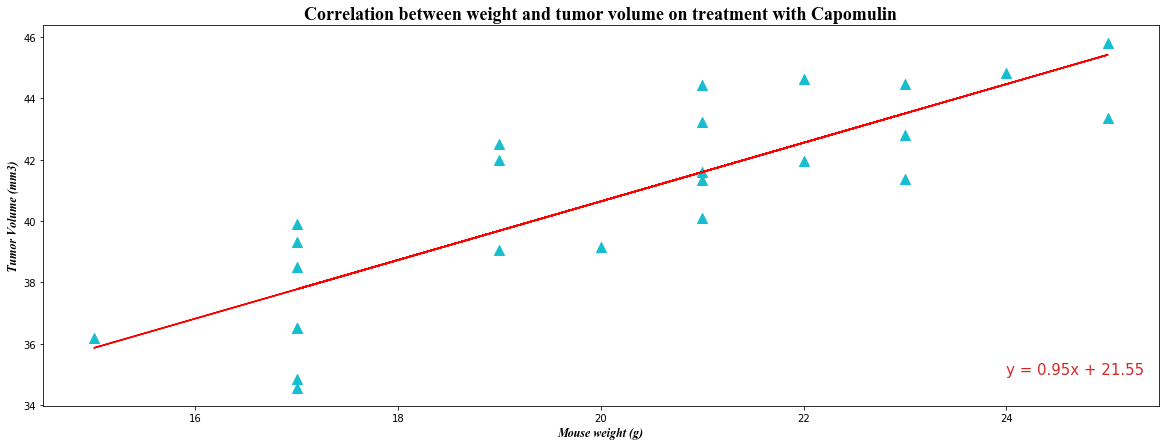

In [42]:
# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(averageweight_mouse, averagevolume_tumor)
regress_values = averageweight_mouse * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,7))
plt.scatter(averageweight_mouse,averagevolume_tumor,marker="^",color="tab:cyan",s=100)
plt.plot(averageweight_mouse,regress_values,"r-")
plt.annotate(line_eq,(24,35),fontsize=15,color="tab:red")
plt.title(f"Correlation between weight and tumor volume on treatment with Capomulin",fontsize=18,fontweight="semibold", family="Times New Roman")
plt.xlabel("Mouse weight (g)",style="italic",family="Times New Roman",fontsize=12)
plt.ylabel("Tumor Volume (mm3)",style="italic",family="Times New Roman",fontsize=12)
print(f"The r-squared is: {round(rvalue,2)}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

In [43]:
# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.